# Spotipy Imports

In [1]:
import os
import json
import spotipy
import spotipy.util as util
from json.decoder import JSONDecodeError

from config import *

In [2]:
import numpy as np
import pandas as pd

### Username number

In [3]:
username = '12166626141'

In [4]:
scope_list = ['user-read-currently-playing','user-read-playback-state',\
              'user-follow-read','user-library-read','user-top-read','user-read-recently-played']

# Throw all permissions from the list into a string for token function:
scope = ' '.join(scope_list)

## Authourize access

In [5]:
token = util.prompt_for_user_token(username,scope=scope,\
    client_id=client_id,\
    client_secret=client_secret,\
    redirect_uri=redirect_uri)

# except:
#     print("exception")
#     os.remove(f'.cache-{username}')
#     token = util.prompt_for_user_token(username,scope=scope,\
#         client_id=client_id,\
#         client_secret=client_secret,\
#         redirect_uri=redirect_uri)

In [6]:
sp = spotipy.Spotify(auth=token)

#### To see what is stored: print(json.dumps(VARIABLE, sort_keys=True, indent=4))

### Test if followed artist is working!

In [7]:
followed = sp.current_user_followed_artists()
print(json.dumps(followed, sort_keys=True, indent=4))

{
    "artists": {
        "cursors": {
            "after": null
        },
        "href": "https://api.spotify.com/v1/me/following?type=artist&limit=20",
        "items": [
            {
                "external_urls": {
                    "spotify": "https://open.spotify.com/artist/2GeCWViPdZTMAUwjU4wDsV"
                },
                "followers": {
                    "href": null,
                    "total": 15
                },
                "genres": [],
                "href": "https://api.spotify.com/v1/artists/2GeCWViPdZTMAUwjU4wDsV",
                "id": "2GeCWViPdZTMAUwjU4wDsV",
                "images": [
                    {
                        "height": 640,
                        "url": "https://i.scdn.co/image/1cef55271477ac352b83fa59c2c2e834ff71b4b7",
                        "width": 640
                    },
                    {
                        "height": 320,
                        "url": "https://i.scdn.co/image/3f4d82b2fc91075e8763e9f0

### Test if search Artist is working!

In [8]:
search_input = input("Artist to search for: ")
search_results = sp.search(\
	search_input,\
	limit=1,\
	offset=0,\
	type="artist"\
	)
artist = search_results['artists']['items'][0]
print(json.dumps(artist, sort_keys=True, indent=4))

Artist to search for: Queen
{
    "external_urls": {
        "spotify": "https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d"
    },
    "followers": {
        "href": null,
        "total": 10965536
    },
    "genres": [
        "glam rock",
        "rock"
    ],
    "href": "https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d",
    "id": "1dfeR4HaWDbWqFHLkxsg1d",
    "images": [
        {
            "height": 806,
            "url": "https://i.scdn.co/image/b040846ceba13c3e9c125d68389491094e7f2982",
            "width": 999
        },
        {
            "height": 516,
            "url": "https://i.scdn.co/image/af2b8e57f6d7b5d43a616bd1e27ba552cd8bfd42",
            "width": 640
        },
        {
            "height": 161,
            "url": "https://i.scdn.co/image/c06971e9ff81696699b829484e3be165f4e64368",
            "width": 200
        },
        {
            "height": 52,
            "url": "https://i.scdn.co/image/6dd0ffd270903d1884edf9058c49f58b03db893d",
   

In [9]:
artist_id = artist["id"]

### Find artist by current users top played

In [10]:
top_artist = sp.current_user_top_artists()
top_artist_names = top_artist['items'][3]
print(json.dumps(top_artist_names, sort_keys=True, indent=4))

{
    "external_urls": {
        "spotify": "https://open.spotify.com/artist/4lgrzShsg2FLA89UM2fdO5"
    },
    "followers": {
        "href": null,
        "total": 63016
    },
    "genres": [
        "avantgarde metal",
        "djent",
        "jazz metal",
        "norwegian metal",
        "progressive metal"
    ],
    "href": "https://api.spotify.com/v1/artists/4lgrzShsg2FLA89UM2fdO5",
    "id": "4lgrzShsg2FLA89UM2fdO5",
    "images": [
        {
            "height": 640,
            "url": "https://i.scdn.co/image/94b3e8f9cc25c9fac28f9e2552bc42f4a0ceef40",
            "width": 640
        },
        {
            "height": 320,
            "url": "https://i.scdn.co/image/802602492d4ebc2d20ca3444db47ceb1612ba369",
            "width": 320
        },
        {
            "height": 160,
            "url": "https://i.scdn.co/image/a04ed4d94bd4d683994fe93dcd5ae90f576a747b",
            "width": 160
        }
    ],
    "name": "Leprous",
    "popularity": 52,
    "type": "artist"

# Pull Audio Analysis for currently playing song

## Let's try using audio_features instead

#### Note: artist_id defined in search section above

In [11]:
#artist id defined in search artist section: 

top_tracks = sp.artist_top_tracks(artist_id)

print(json.dumps(top_tracks, sort_keys=True, indent=4))

{
    "tracks": [
        {
            "album": {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d"
                        },
                        "href": "https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d",
                        "id": "1dfeR4HaWDbWqFHLkxsg1d",
                        "name": "Queen",
                        "type": "artist",
                        "uri": "spotify:artist:1dfeR4HaWDbWqFHLkxsg1d"
                    }
                ],
                "external_urls": {
                    "spotify": "https://open.spotify.com/album/6X9k3hSsvQck2OfKYdBbXr"
                },
                "href": "https://api.spotify.com/v1/albums/6X9k3hSsvQck2OfKYdBbXr",
                "id": "6X9k3hSsvQck2OfKYdBbXr",
                "images": [
                    {
                        "h

In [12]:
top_tracks['tracks'][0]['album']['release_date']

'1975-11-21'

In [13]:
track_list = []
track_names = []
track_pop = []
track_release = []

for song in top_tracks['tracks']:
    track_list.append(song['id'])
    track_names.append(song['name'])
    track_pop.append(song['popularity'])
    track_release.append(song['album']['release_date'])
print(track_list)

['7tFiyTwD0nx5a1eklYtX2J', '7hQJA50XrCWABAu5v6QZ4i', '57JVGBtBLCfHw2muk5416J', '11IzgLRXV7Cgek3tEgGgjw', '54flyrjcdnQdco7300avMJ', '6cFZ4PLC19taNlpl9pbGMf', '7ccI9cStQbQdystvc6TvxD', '7h2yhVxcZOGyQdOwD4Hu8J', '5ODSfJ2h7m1Zkg6MIm2C9Q', '790YJcgHlN3SaosQCHlWzn']


In [14]:
track_features = sp.audio_features(track_list)
print(json.dumps(track_features, sort_keys=True, indent=4))
print(type(track_features))

[
    {
        "acousticness": 0.254,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/7tFiyTwD0nx5a1eklYtX2J",
        "danceability": 0.397,
        "duration_ms": 354320,
        "energy": 0.396,
        "id": "7tFiyTwD0nx5a1eklYtX2J",
        "instrumentalness": 0,
        "key": 3,
        "liveness": 0.268,
        "loudness": -9.91,
        "mode": 1,
        "speechiness": 0.05,
        "tempo": 142.913,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/7tFiyTwD0nx5a1eklYtX2J",
        "type": "audio_features",
        "uri": "spotify:track:7tFiyTwD0nx5a1eklYtX2J",
        "valence": 0.227
    },
    {
        "acousticness": 0.0488,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/7hQJA50XrCWABAu5v6QZ4i",
        "danceability": 0.559,
        "duration_ms": 209413,
        "energy": 0.855,
        "id": "7hQJA50XrCWABAu5v6QZ4i",
        "instrumentalness": 0.000681,
        "key": 5,
        "liveness": 

In [15]:
df_feat = pd.DataFrame(track_features)
df_feat['Name'] = track_names

df_feat['popularity'] = track_pop
df_feat['Date'] = track_release
df_feat.set_index('Name',inplace=True)
df_feat.drop(columns=['analysis_url','track_href','type','uri'], inplace=True)
df_feat.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Date
Name,,,,,,,,,,,,,,,,
Bohemian Rhapsody - Remastered 2011,0.2540,0.397,354320,0.396,7tFiyTwD0nx5a1eklYtX2J,0.000000,3,0.2680,-9.910,1,0.0500,142.913,4,0.227,81,1975-11-21
Don't Stop Me Now - Remastered,0.0488,0.559,209413,0.855,7hQJA50XrCWABAu5v6QZ4i,0.000681,5,0.6800,-5.077,1,0.1860,156.311,4,0.605,78,1978-11-10
Another One Bites The Dust - Remastered 2011,0.1150,0.951,214653,0.530,57JVGBtBLCfHw2muk5416J,0.179000,5,0.1700,-6.594,0,0.1780,109.979,4,0.699,77,1980-06-27
Under Pressure - Remastered,0.4440,0.667,248440,0.705,11IzgLRXV7Cgek3tEgGgjw,0.000000,2,0.1070,-7.657,1,0.0488,113.808,4,0.506,75,1982-05-03
We Will Rock You - Remastered,0.6880,0.692,122067,0.488,54flyrjcdnQdco7300avMJ,0.000000,11,0.4000,-7.282,0,0.1040,81.400,4,0.510,74,1977-10-28
Somebody To Love - Remastered 2011,0.1720,0.492,296493,0.676,6cFZ4PLC19taNlpl9pbGMf,0.000000,8,0.2390,-6.861,1,0.0516,110.232,3,0.412,75,1976-12-10
We Are The Champions - Remastered 2011,0.3890,0.467,179200,0.486,7ccI9cStQbQdystvc6TvxD,0.000000,10,0.1210,-6.645,1,0.0274,95.205,3,0.184,72,1977-10-28
I Want To Break Free - Remastered 2011,0.1080,0.793,258013,0.428,7h2yhVxcZOGyQdOwD4Hu8J,0.000194,4,0.0701,-8.962,1,0.0319,108.942,4,0.582,70,1984-02-27
Radio Ga Ga - Live Aid,0.0138,0.406,245680,0.934,5ODSfJ2h7m1Zkg6MIm2C9Q,0.000000,5,0.9550,-6.668,1,0.0845,118.823,4,0.395,70,2018-10-19


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df_stats = df_feat.drop(columns=['id','key','mode','time_signature','Date', 'duration_ms', 'loudness','tempo','popularity'])

In [18]:
df_stats

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Name,,,,,,,
Bohemian Rhapsody - Remastered 2011,0.2540,0.397,0.396,0.000000,0.2680,0.0500,0.227
Don't Stop Me Now - Remastered,0.0488,0.559,0.855,0.000681,0.6800,0.1860,0.605
Another One Bites The Dust - Remastered 2011,0.1150,0.951,0.530,0.179000,0.1700,0.1780,0.699
Under Pressure - Remastered,0.4440,0.667,0.705,0.000000,0.1070,0.0488,0.506
We Will Rock You - Remastered,0.6880,0.692,0.488,0.000000,0.4000,0.1040,0.510
Somebody To Love - Remastered 2011,0.1720,0.492,0.676,0.000000,0.2390,0.0516,0.412
We Are The Champions - Remastered 2011,0.3890,0.467,0.486,0.000000,0.1210,0.0274,0.184
I Want To Break Free - Remastered 2011,0.1080,0.793,0.428,0.000194,0.0701,0.0319,0.582
Radio Ga Ga - Live Aid,0.0138,0.406,0.934,0.000000,0.9550,0.0845,0.395


In [19]:
df_stats.mean()
df_stats.columns
pd.melt(df_stats)

,variable,value
0,acousticness,0.2540
1,acousticness,0.0488
2,acousticness,0.1150
3,acousticness,0.4440
4,acousticness,0.6880
5,acousticness,0.1720
6,acousticness,0.3890
7,acousticness,0.1080
8,acousticness,0.0138
9,acousticness,0.9270


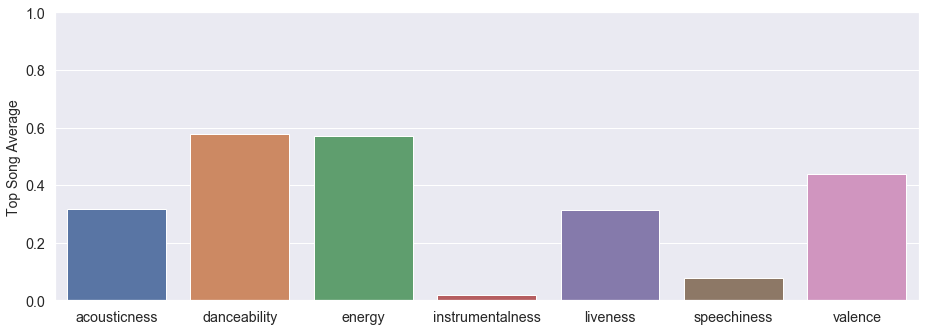

In [20]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.barplot(x=df_stats.columns, y=df_stats.mean())

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

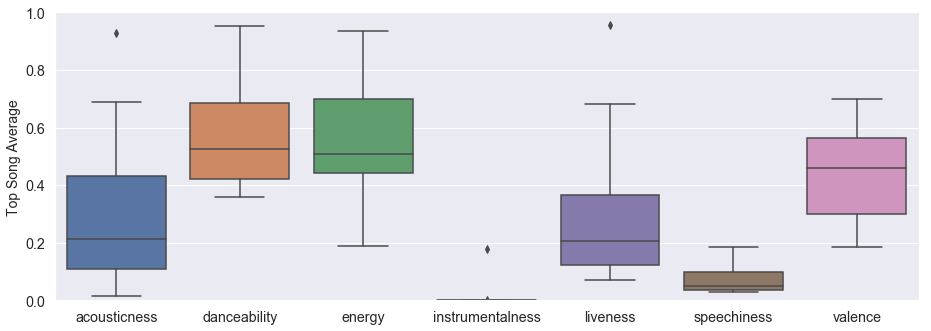

In [21]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.boxplot(x='variable', y='value', data=pd.melt(df_stats))
ax.set_xlabel('')
ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

## Lets make charts of the following parameters:
 - Key Signature (key map needed)
 - Tempo(make bins)
 - Mode (major=1 or minor=0)
 - Duration (make bins)
 - loudness (dB)
 - time signature (not sure if I trust it)
 <hr>

In [22]:
# map key numbers with actual letter Keys, and mode with major/minor
keyMap = {
    0:"C",
    1:"C#/Db",
    2:"D",
    3:"D#/Eb",
    4:"E",
    5:"F",
    6:"F#/Gb",
    7:"G",
    8:"G#/Ab",
    9:"A",
    10:"A#/Bb",
    11:"B",
}

modeMap = {
    0:"minor",
    1:"major",
}

In [23]:
df_feat["key"] = df_feat["key"].map(keyMap)
df_feat["mode"] = df_feat["mode"].map(modeMap)

In [35]:
df_feat

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Date
Name,,,,,,,,,,,,,,,,
Bohemian Rhapsody - Remastered 2011,0.2540,0.397,354320,0.396,7tFiyTwD0nx5a1eklYtX2J,0.000000,D#/Eb,0.2680,-9.910,major,0.0500,142.913,4,0.227,81,1975-11-21
Don't Stop Me Now - Remastered,0.0488,0.559,209413,0.855,7hQJA50XrCWABAu5v6QZ4i,0.000681,F,0.6800,-5.077,major,0.1860,156.311,4,0.605,78,1978-11-10
Another One Bites The Dust - Remastered 2011,0.1150,0.951,214653,0.530,57JVGBtBLCfHw2muk5416J,0.179000,F,0.1700,-6.594,minor,0.1780,109.979,4,0.699,77,1980-06-27
Under Pressure - Remastered,0.4440,0.667,248440,0.705,11IzgLRXV7Cgek3tEgGgjw,0.000000,D,0.1070,-7.657,major,0.0488,113.808,4,0.506,75,1982-05-03
We Will Rock You - Remastered,0.6880,0.692,122067,0.488,54flyrjcdnQdco7300avMJ,0.000000,B,0.4000,-7.282,minor,0.1040,81.400,4,0.510,74,1977-10-28
Somebody To Love - Remastered 2011,0.1720,0.492,296493,0.676,6cFZ4PLC19taNlpl9pbGMf,0.000000,G#/Ab,0.2390,-6.861,major,0.0516,110.232,3,0.412,75,1976-12-10
We Are The Champions - Remastered 2011,0.3890,0.467,179200,0.486,7ccI9cStQbQdystvc6TvxD,0.000000,A#/Bb,0.1210,-6.645,major,0.0274,95.205,3,0.184,72,1977-10-28
I Want To Break Free - Remastered 2011,0.1080,0.793,258013,0.428,7h2yhVxcZOGyQdOwD4Hu8J,0.000194,E,0.0701,-8.962,major,0.0319,108.942,4,0.582,70,1984-02-27
Radio Ga Ga - Live Aid,0.0138,0.406,245680,0.934,5ODSfJ2h7m1Zkg6MIm2C9Q,0.000000,F,0.9550,-6.668,major,0.0845,118.823,4,0.395,70,2018-10-19


## Key Signature

In [25]:
keyGroup = df_feat.groupby(by="key").count()

keyGroup.reset_index(inplace=True)

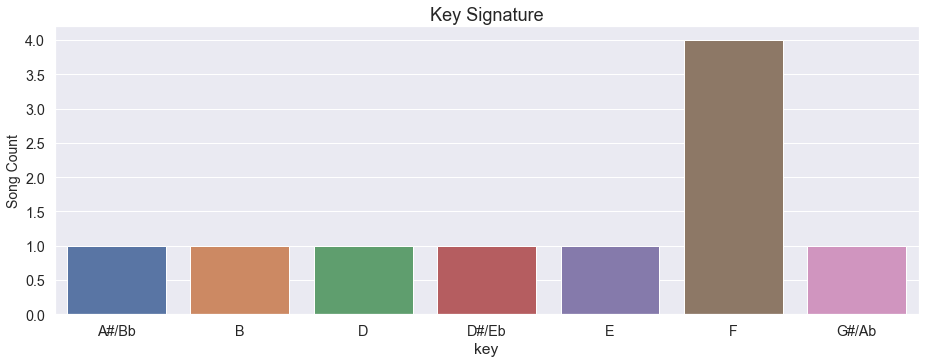

In [34]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="key",y="id",data=keyGroup)
ax.set_title("Key Signature", fontsize=18)
ax.set_ylabel('Song Count', fontsize=14)
plt.show()

## Mode

In [32]:
modeGroup = df_feat.groupby(by="mode").count()

modeGroup.reset_index(inplace=True)

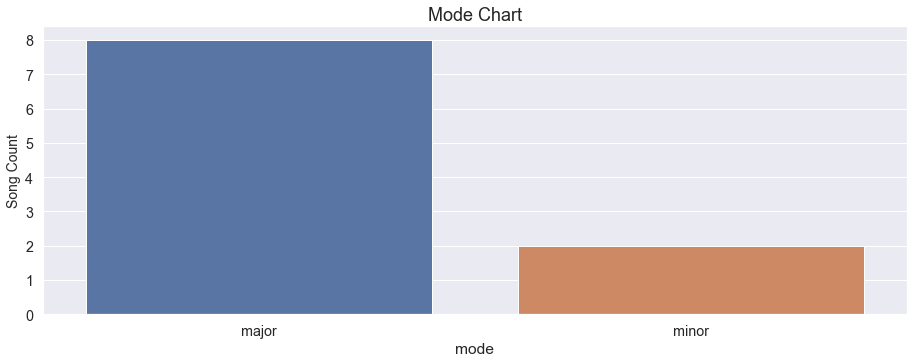

In [33]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="mode",y="id",data=modeGroup)
ax.set_title("Mode Chart", fontsize=18)
ax.set_ylabel('Song Count', fontsize=14)
plt.show()

## Duration

In [68]:
import datetime
# convert duration to minutes
df_feat["duration"] = pd.to_timedelta(df_feat["duration_ms"], unit="ms")
df_feat["duration"] / pd.Timedelta(minutes=1)

Name
Bohemian Rhapsody - Remastered 2011             5.905333
Don't Stop Me Now - Remastered                  3.490217
Another One Bites The Dust - Remastered 2011    3.577550
Under Pressure - Remastered                     4.140667
We Will Rock You - Remastered                   2.034450
Somebody To Love - Remastered 2011              4.941550
We Are The Champions - Remastered 2011          2.986667
I Want To Break Free - Remastered 2011          4.300217
Radio Ga Ga - Live Aid                          4.094667
Love Of My Life - Remastered 2011               3.623333
Name: duration, dtype: float64

Text(0.5, 1.0, 'Top Songs Duration')

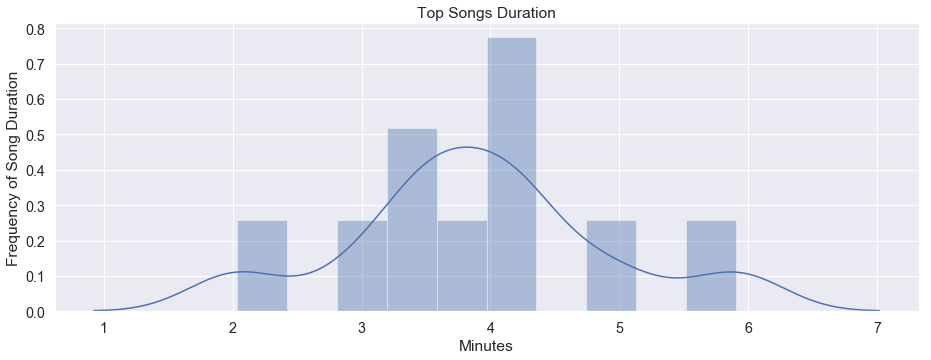

In [73]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["duration"] / pd.Timedelta(minutes=1),
                bins=10)
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency of Song Duration")
ax.set_title("Top Songs Duration")


In [75]:
df_feat["tempo"]

Name
Bohemian Rhapsody - Remastered 2011             142.913
Don't Stop Me Now - Remastered                  156.311
Another One Bites The Dust - Remastered 2011    109.979
Under Pressure - Remastered                     113.808
We Will Rock You - Remastered                    81.400
Somebody To Love - Remastered 2011              110.232
We Are The Champions - Remastered 2011           95.205
I Want To Break Free - Remastered 2011          108.942
Radio Ga Ga - Live Aid                          118.823
Love Of My Life - Remastered 2011                77.756
Name: tempo, dtype: float64

## Tempo

Text(0.5, 1.0, 'Top Songs Duration')

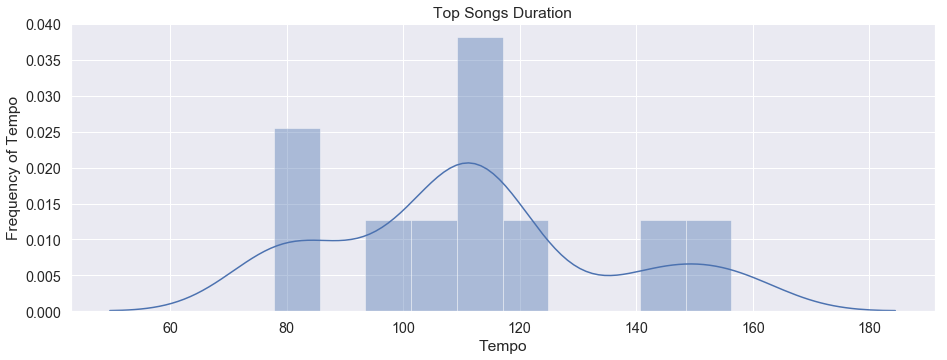

In [76]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["tempo"],
                bins=10)
ax.set_xlabel("Tempo")
ax.set_ylabel("Frequency of Tempo")
ax.set_title("Top Songs Duration")

## Loudness

Text(0.5, 1.0, 'Top Songs Duration')

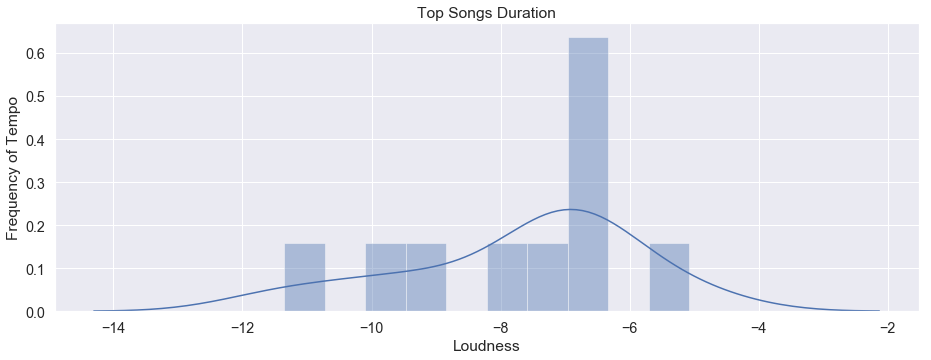

In [77]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["loudness"],
                bins=10)
ax.set_xlabel("Loudness")
ax.set_ylabel("Frequency of Tempo")
ax.set_title("Top Songs Duration")